In [36]:
import pandas as pd

df1 = pd.read_csv("dataset_grupo1.csv", encoding="latin1", sep=";")
df2 = pd.read_csv("dataset2_grupo1.csv", encoding="latin1", sep=";")
df3 = pd.read_csv("dataset3_grupo1.csv", encoding="latin1", sep=";")
#Dados = planilhona com todas as info
dados = df1.merge(df2, on="Data").merge(df3, on="Data")

print(dados.head())


dados.to_csv("dataset_unificado.csv", index=False, encoding="utf-8-sig")

#conferindo os dados:
print(dados.isnull().sum())
#não há n.a values
print(dados['Data'].value_counts().sort_index())

#aparentemente tudo certo :)
dados.head()

      Data  \
0  12/2006   
1  01/2007   
2  02/2007   
3  03/2007   
4  04/2007   

  433 - Índice nacional de preços ao consumidor-amplo (IPCA) - Var. % mensal  \
0                                              0,48                            
1                                              0,44                            
2                                              0,44                            
3                                              0,37                            
4                                              0,25                            

  3695 - Taxa de câmbio - Livre - Dólar americano (compra) - Fim de período - mensal - u.m.c./US$  \
0                                            2,1372                                                 
1                                            2,1239                                                 
2                                            2,1174                                                 
3                             

,Data,433 - Índice nacional de preços ao consumidor-amplo (IPCA) - Var. % mensal,3695 - Taxa de câmbio - Livre - Dólar americano (compra) - Fim de período - mensal - u.m.c./US$,4380 - PIB mensal - Valores correntes (R$ milhões) - R$ (milhões),4469 - Dívida Líquida do Setor Público - Saldos em R$ milhões - Total - Governo Federal - R$ (milhões),4470 - Dívida Líquida do Setor Público - Saldos em R$ milhões - Total - Banco Central - R$ (milhões),4472 - Dívida Líquida do Setor Público - Saldos em R$ milhões - Total - Governos estaduais - R$ (milhões),4473 - Dívida Líquida do Setor Público - Saldos em R$ milhões - Total - Governos municipais - R$ (milhões),13761 - Dívida bruta do governo geral - Saldos em R$ milhões - Metodologia utilizada a partir de 2008 - R$ (milhões),13762 - Dívida bruta do governo geral (% PIB) - Metodologia utilizada a partir de 2008 - %,"13763 - Dívida bruta do governo geral - Saldos em US$ milhões - Metodologia utilizada a partir de 2008 - US$ (milhões),,,,,,,,,,",4189 - Taxa de juros - Selic acumulada no mês anualizada base 252 - % a.a.,"4390 - Taxa de juros - Selic acumulada no mês - % a.m.,,","29037 - Endividamento das famílias com o Sistema Financeiro Nacional em relação à renda acumulada dos últimos doze meses (RNDBF) - %,"
0,12/2006,"0,48","2,1372","215.338,3","727.318,55","8.481,33","316.863,54","47.073,27","1.336.644,90","55,48","625.418,73","13,19","0,99","21,98"
1,01/2007,"0,44","2,1239","206.662,3","739.728,91","-4.509,71","316.460,09","46.447,36","1.367.451,91","56,17","643.840,6","13,13","1,8","22,28"
2,02/2007,"0,44","2,1174","201.552,1","747.648,62","-4.194,13","317.158,09","46.653,24","1.399.083,71","56,90","660.755,51","12,93","0,87","22,48"
3,03/2007,"0,37","2,0496","223.208,6","750.319,85","5.830,79","316.163,14","46.477,56","1.423.273,45","57,24","694.415,23","12,74","1,5","22,4"
4,04/2007,"0,25","2,0331","218.931,2","745.927,20","7.990,12","314.070,80","46.673,09","1.438.854,85","57,17","707.714,75","12,58","0,94","22,36"


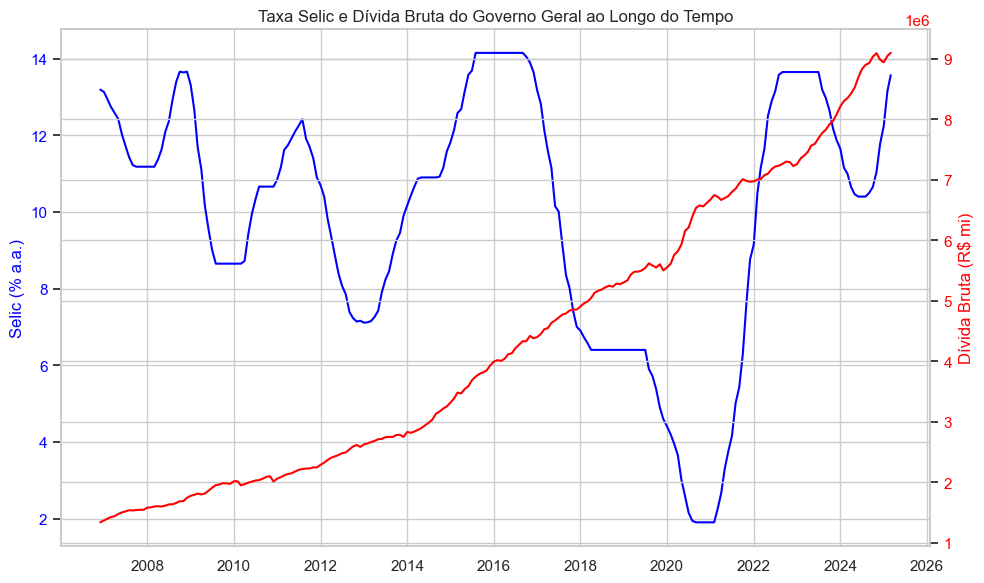

In [37]:
import matplotlib.pyplot as plt

#Taxa SELIC e Dívida Bruta
dados["Data"] = pd.to_datetime(dados["Data"], format="%m/%Y")

dados["Selic (% a.a.)"] = dados["4189 - Taxa de juros - Selic acumulada no mês anualizada base 252 - % a.a."].str.replace(",", ".").astype(float)
dados["Dívida Bruta (R$ mi)"] = dados["13761 - Dívida bruta do governo geral - Saldos em R$ milhões - Metodologia utilizada a partir de 2008 - R$ (milhões)"].str.replace(".", "").str.replace(",", ".").astype(float)

fig, ax1 = plt.subplots(figsize=(10, 6))

#Eixo Selic
ax1.plot(dados["Data"], dados["Selic (% a.a.)"], color='blue', label="Selic (% a.a.)")
ax1.set_ylabel("Selic (% a.a.)", color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

#Eixo da Dívida
ax2 = ax1.twinx()
ax2.plot(dados["Data"], dados["Dívida Bruta (R$ mi)"], color='red', label="Dívida Bruta (R$ milhões)")
ax2.set_ylabel("Dívida Bruta (R$ mi)", color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.title("Taxa Selic e Dívida Bruta do Governo Geral ao Longo do Tempo")
fig.tight_layout()
plt.show()

In [38]:
#relação entre o crescimento da dívida do governo e as variações da selic
import pandas as pd

dados["Data"] = pd.to_datetime(dados["Data"], format="%m/%Y")

dados["Selic (% a.a.)"] = dados["4189 - Taxa de juros - Selic acumulada no mês anualizada base 252 - % a.a."].str.replace(",", ".").astype(float)
dados["Dívida Bruta (R$ mi)"] = dados["13761 - Dívida bruta do governo geral - Saldos em R$ milhões - Metodologia utilizada a partir de 2008 - R$ (milhões)"].str.replace(".", "").str.replace(",", ".").astype(float)

dados["Dívida Aumento (R$ mi)"] = dados["Dívida Bruta (R$ mi)"].diff()

dados = dados.dropna(subset=["Dívida Aumento (R$ mi)"])

correlacao = dados["Selic (% a.a.)"].corr(dados["Dívida Aumento (R$ mi)"])

print(correlacao)

-0.05568478790529951


In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Converter para float (mantendo nomes originais das colunas)
dados["4390 - Taxa de juros - Selic acumulada no mês - % a.m.,,"] = dados["4390 - Taxa de juros - Selic acumulada no mês - % a.m.,,"].str.replace(",", ".").astype(float)
dados["433 - Índice nacional de preços ao consumidor-amplo (IPCA) - Var. % mensal"] = dados["433 - Índice nacional de preços ao consumidor-amplo (IPCA) - Var. % mensal"].str.replace(",", ".").astype(float)

# Calcular a correlação
correlacao_selic_ipca = dados["4390 - Taxa de juros - Selic acumulada no mês - % a.m.,,"].corr(
    dados["433 - Índice nacional de preços ao consumidor-amplo (IPCA) - Var. % mensal"]
)
print(correlacao_selic_ipca)


-0.04345195092591911


In [40]:
#correlação e rquadrado
correlacao = dados["Selic (% a.a.)"].corr(dados["Dívida Bruta (R$ mi)"])
print(correlacao)
rquadrado = correlacao ** 2
print(rquadrado)
#resultado tá bem baixo, imagino que tenham outros fatores que estejam no meio dificultando a análise

-0.17354908965195615
0.030119286519022712


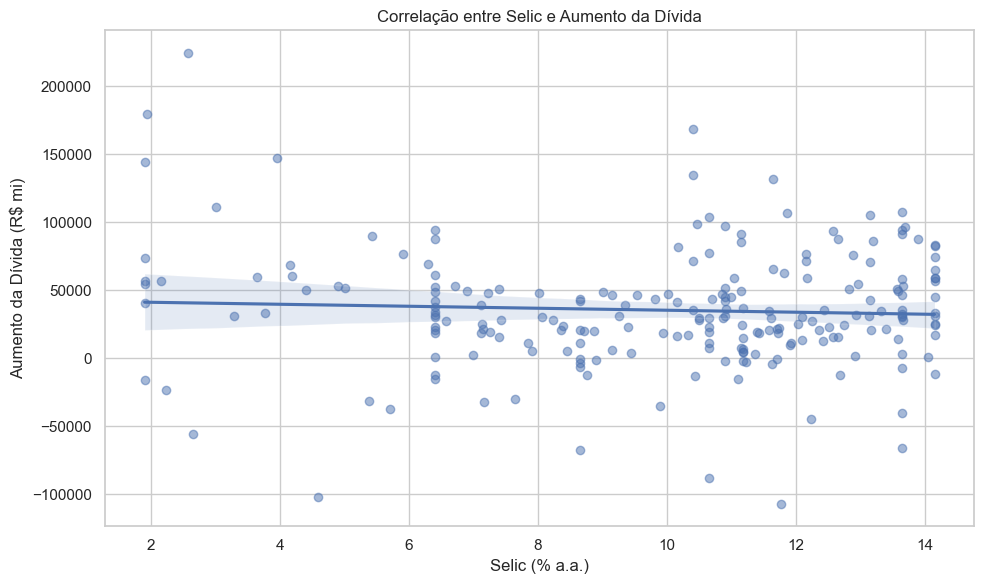

In [41]:
#é a mesma correlação do heatmap, mas fiz em outro tipo de graph.

import seaborn as sns

plt.figure(figsize=(10, 6))
sns.regplot(x="Selic (% a.a.)", y="Dívida Aumento (R$ mi)", data=dados, scatter_kws={"alpha":0.5})
plt.title("Correlação entre Selic e Aumento da Dívida")
plt.xlabel("Selic (% a.a.)")
plt.ylabel("Aumento da Dívida (R$ mi)")
plt.grid(True)
plt.tight_layout()
plt.show()


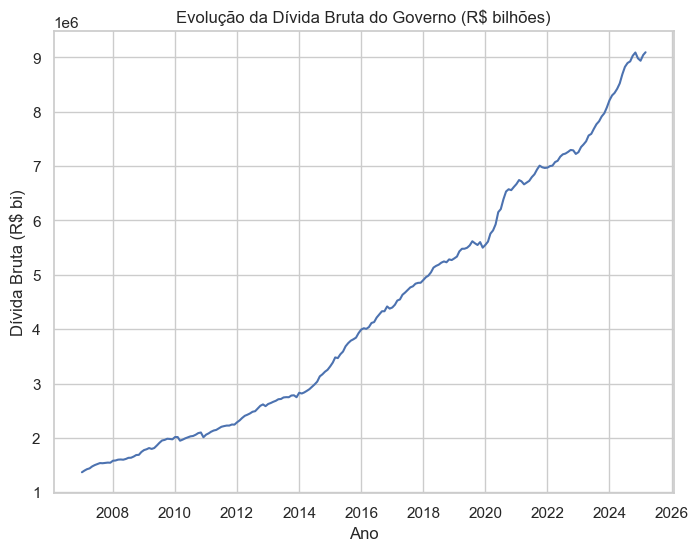

In [42]:
#crescimento Dívida Bruta em linhas, gráfico legal pra introduzir

plt.figure(figsize=(8,6))
sns.lineplot(data=dados, x="Data", y="Dívida Bruta (R$ mi)")
plt.title("Evolução da Dívida Bruta do Governo (R$ bilhões)")
plt.xlabel("Ano")
plt.ylabel("Dívida Bruta (R$ bi)")
plt.show()



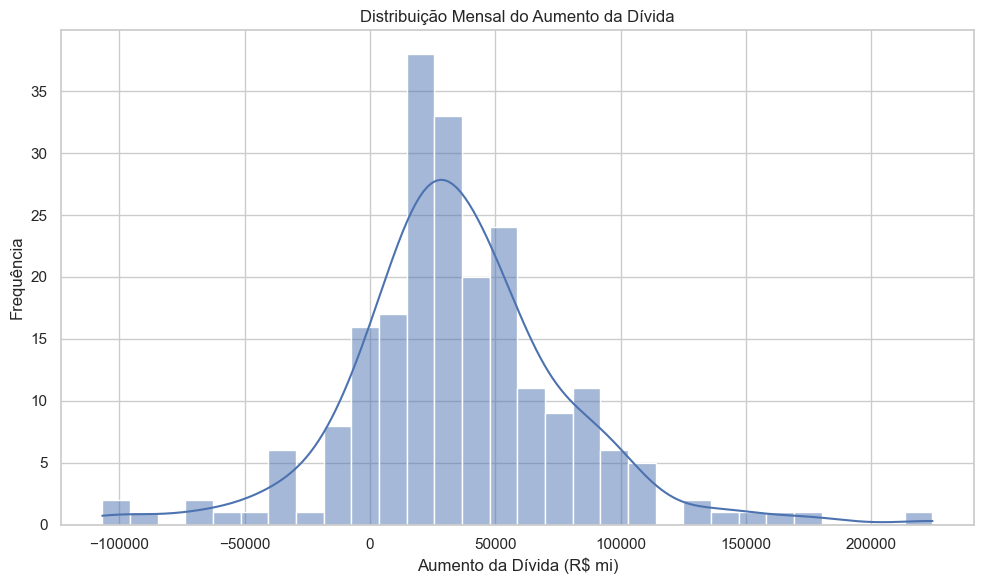

In [43]:
#histograma

plt.figure(figsize=(10, 6))
sns.histplot(dados["Dívida Aumento (R$ mi)"], bins=30, kde=True)
plt.title("Distribuição Mensal do Aumento da Dívida")
plt.xlabel("Aumento da Dívida (R$ mi)")
plt.ylabel("Frequência")
plt.tight_layout()
plt.show()


C:\Users\ropgr\AppData\Local\Temp\ipykernel_2656\901994341.py:33: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(
C:\Users\ropgr\AppData\Local\Temp\ipykernel_2656\901994341.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


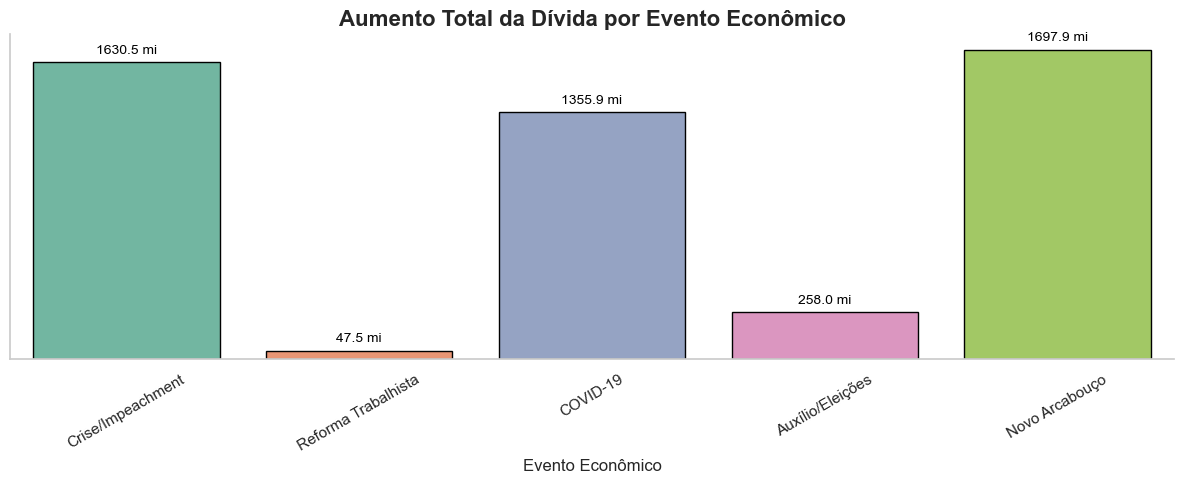

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Função para classificar eventos econômicos
def evento(data):
    if pd.Timestamp("2014-01-01") <= data <= pd.Timestamp("2016-12-31"):
        return "Crise/Impeachment"
    elif pd.Timestamp("2017-07-01") <= data <= pd.Timestamp("2017-07-31"):
        return "Reforma Trabalhista"
    elif pd.Timestamp("2020-03-01") <= data <= pd.Timestamp("2021-12-31"):
        return "COVID-19"
    elif pd.Timestamp("2022-01-01") <= data <= pd.Timestamp("2022-12-31"):
        return "Auxílio/Eleições"
    elif data >= pd.Timestamp("2023-04-01"):
        return "Novo Arcabouço"
    else:
        return "Outros"

# Pré-processamento
dados["Data"] = pd.to_datetime(dados["Data"], format="%m/%Y")
dados["Evento_Econômico"] = dados["Data"].apply(evento)
dados["Dívida Bruta (R$ mi)"] = dados["13761 - Dívida bruta do governo geral - Saldos em R$ milhões - Metodologia utilizada a partir de 2008 - R$ (milhões)"]\
    .str.replace(".", "", regex=False).str.replace(",", ".", regex=False).astype(float)
dados["Dívida Aumento (R$ mi)"] = dados["Dívida Bruta (R$ mi)"].diff()
dados = dados.dropna(subset=["Dívida Aumento (R$ mi)"])
dados_filtrados = dados[dados["Evento_Econômico"] != "Outros"]


plt.figure(figsize=(12, 5))
sns.set_style("whitegrid")
ax = sns.barplot(
    data=dados_filtrados,
    x="Evento_Econômico",
    y="Dívida Aumento (R$ mi)",
    estimator=np.sum,
    ci=None,
    palette="Set2",
    edgecolor="black"
)

# Títulos e eixos
plt.title("Aumento Total da Dívida por Evento Econômico", fontsize=16, fontweight='bold')
plt.xlabel("Evento Econômico", fontsize=12)
plt.ylabel("")  # sem y
plt.xticks(rotation=30, fontsize=11)
plt.yticks([])

# Rótulos nas barras com valores em bilhões
for p in ax.patches:
    height = p.get_height()
    label = f'{height/1_000:.1f} mi' if height > 1_000 else f'{height:,.0f}'
    ax.annotate(label, (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 4),
                textcoords='offset points')

# Remover a borda do gráfico
sns.despine()

plt.tight_layout()
plt.show()



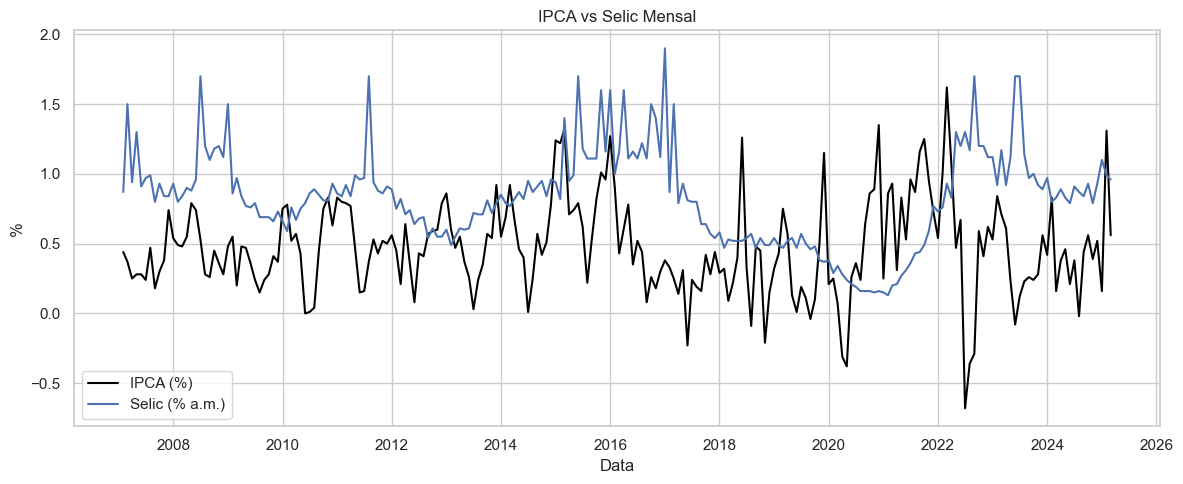

In [45]:
plt.figure(figsize=(12,5))
plt.plot(dados["Data"], dados["433 - Índice nacional de preços ao consumidor-amplo (IPCA) - Var. % mensal"], label="IPCA (%)", color = "black")
plt.plot(dados["Data"], dados["4390 - Taxa de juros - Selic acumulada no mês - % a.m.,,"], label="Selic (% a.m.)",)
plt.title("IPCA vs Selic Mensal")
plt.xlabel("Data")
plt.ylabel("%")
plt.legend()
plt.tight_layout()
plt.show()


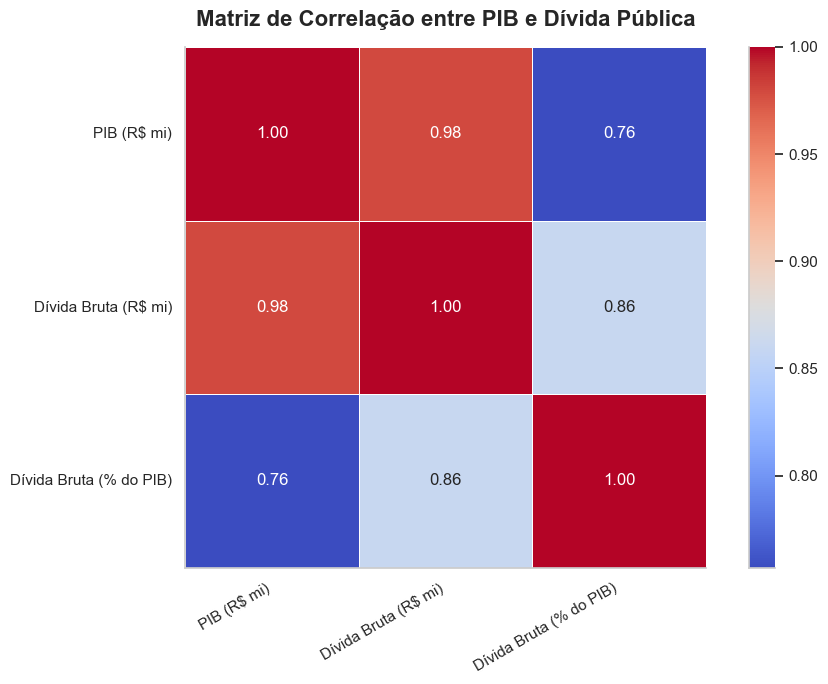

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Dicionário com nomes técnicos → nomes claros
colunas_renomeadas = {
    "4380 - PIB mensal - Valores correntes (R$ milhões) - R$ (milhões)": "PIB (R$ mi)",
    "13761 - Dívida bruta do governo geral - Saldos em R$ milhões - Metodologia utilizada a partir de 2008 - R$ (milhões)": "Dívida Bruta (R$ mi)",
    "13762 - Dívida bruta do governo geral (% PIB) - Metodologia utilizada a partir de 2008 - %": "Dívida Bruta (% do PIB)"
}

# Conversão para float
for col in colunas_renomeadas:
    dados[col] = dados[col].astype(str)\
        .str.replace(".", "", regex=False)\
        .str.replace(",", ".", regex=False)\
        .astype(float)

# Criar um novo DataFrame com os nomes claros
dados_corr = dados[list(colunas_renomeadas.keys())].rename(columns=colunas_renomeadas)

# Calcular a matriz de correlação
matriz = dados_corr.corr()

# Plot do heatmap
plt.figure(figsize=(10, 7))
sns.set(style="whitegrid")

ax = sns.heatmap(
    matriz,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5,
    square=True,
    annot_kws={"fontsize": 12}
)

plt.title("Matriz de Correlação entre PIB e Dívida Pública", fontsize=16, fontweight='bold', pad=15)
plt.xticks(fontsize=11, rotation=30, ha='right')
plt.yticks(fontsize=11, rotation=0)
plt.tight_layout()
sns.despine()
plt.show()


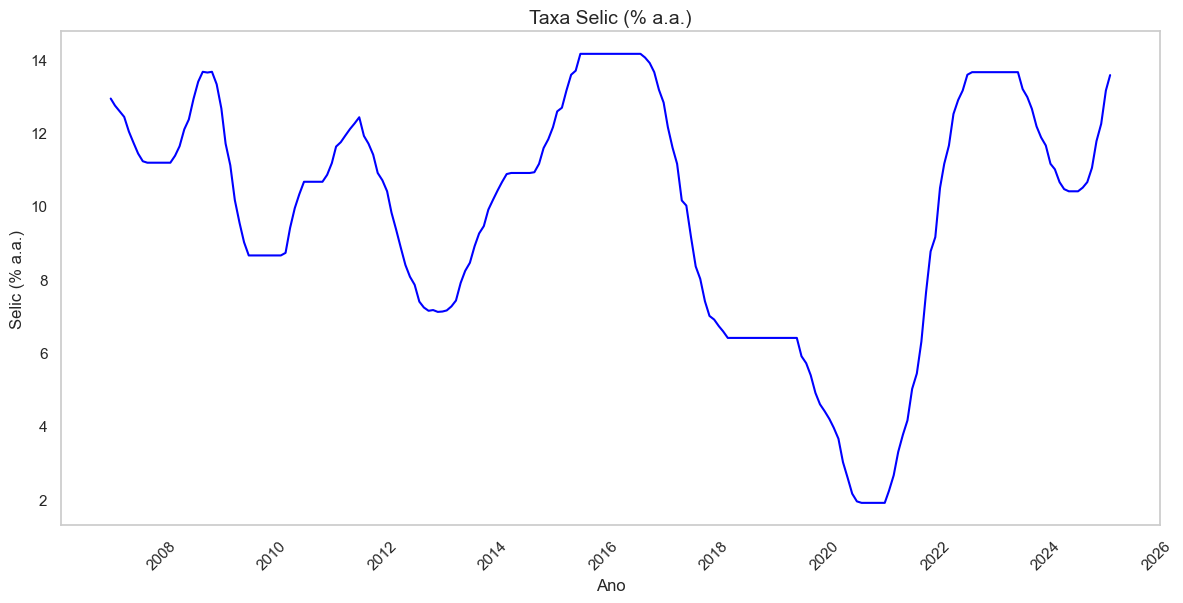

Correlação entre Selic e aumento da dívida: -0.0553


In [48]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=dados, x="Data", y="Selic (% a.a.)", color='blue')
plt.title("Taxa Selic (% a.a.)", fontsize=14)
plt.xlabel("Ano")
plt.ylabel("Selic (% a.a.)")
plt.grid(False)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

correlacao = dados["Selic (% a.a.)"].corr(dados["Dívida Aumento (R$ mi)"])
print(f"Correlação entre Selic e aumento da dívida: {correlacao:.4f}")



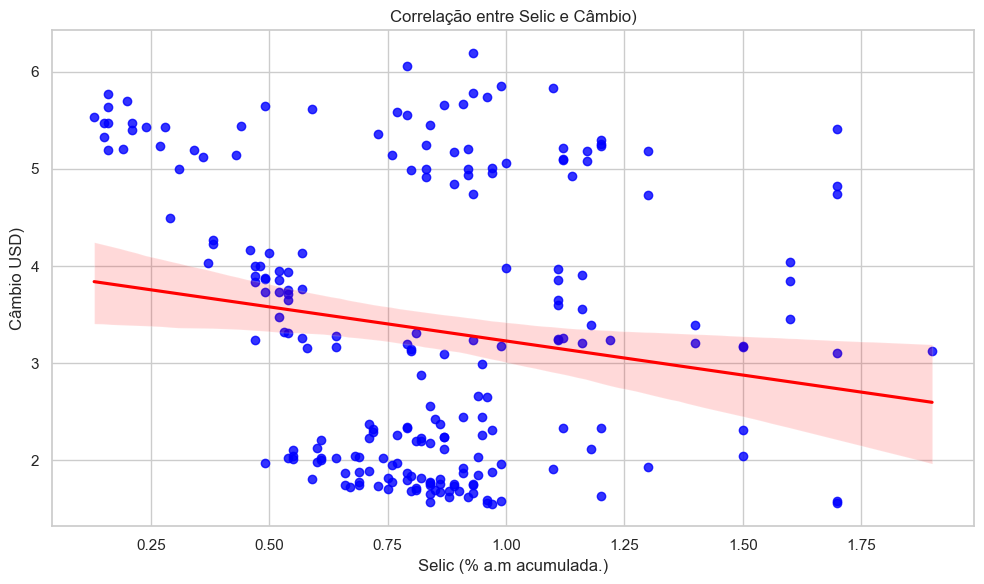

In [49]:
#refazr

import seaborn as sns
import matplotlib.pyplot as plt

dados["Selic (% a.m.)"] = dados["4390 - Taxa de juros - Selic acumulada no mês - % a.m.,,"].astype(str).str.replace(",", ".").astype(float)
dados["Câmbio (R$/US$)"] = dados["3695 - Taxa de câmbio - Livre - Dólar americano (compra) - Fim de período - mensal - u.m.c./US$"].astype(str).str.replace(",", ".").astype(float)

plt.figure(figsize=(10, 6))
sns.regplot(
    x=dados["Selic (% a.m.)"],
    y=dados["Câmbio (R$/US$)"],
    scatter_kws={"color": "blue"},
    line_kws={"color": "red"},
)
plt.title("Correlação entre Selic e Câmbio)")
plt.xlabel("Selic (% a.m acumulada.)")
plt.ylabel("Câmbio USD)")
plt.grid(True)
plt.tight_layout()
plt.show()


KeyError: 'IPCA (%)'

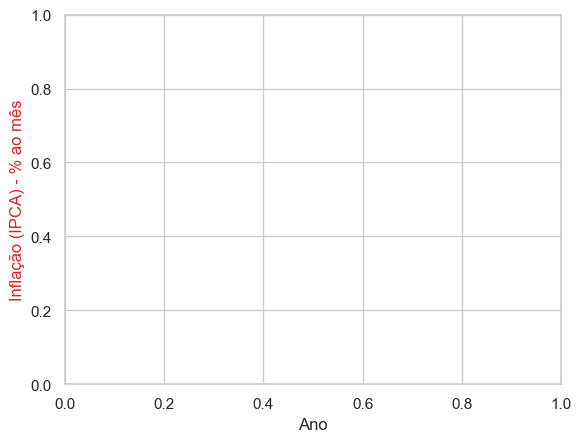

In [50]:
# Gráfico com dois eixos Y e sem linhas de grade
fig, ax1 = plt.subplots()

# Eixo Y da esquerda (IPCA)
color = 'tab:red'
ax1.set_xlabel("Ano")
ax1.set_ylabel("Inflação (IPCA) - % ao mês", color=color)
ax1.plot(dados['Data'], dados['IPCA (%)'], color=color, label='Inflação (IPCA)')
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(False)  # Remove a grade do eixo principal

# Eixo Y da direita (Endividamento)
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel("Endividamento das Famílias - %", color=color)
ax2.plot(dados['Data'], dados['Endividamento (%)'], color=color, label='Endividamento das Famílias')
ax2.tick_params(axis='y', labelcolor=color)
ax2.grid(False)  # Remove a grade do eixo secundário

# Título e layout
plt.title("Inflação (IPCA) e Endividamento das Famílias ao Longo do Tempo (Eixos Separados)")
fig.tight_layout()
plt.show()


print("""
-Gráfico Temporal:

O gráfico mostra que tanto a inflação (IPCA) quanto o endividamento das famílias variam ao longo do tempo, mas não de forma obviamente sincronizada.

-Gráfico de Dispersão:

Os pontos mostram uma fraca tendência positiva, mas com muita dispersão — ou seja, não há uma relação clara e linear.

-Correlação de Pearson:

O coeficiente é ≈ 0,10, o que indica uma correlação positiva fraca entre inflação e endividamento.

Isso sugere que a inflação tem pouca influência direta sobre o nível de endividamento das famílias, ao menos de forma linear e direta.
""")
